In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [33]:
# Reads all progress.csv files in specified folder
data_path = "./data/var decider tresh0.0lr1e-4/"

all_data = []

filenames = glob.glob(f"{data_path}*")
for i, filename in enumerate(filenames):
    progress_csv = f"{filename}/progress.csv"
    print(f"Reading file {progress_csv}")
    all_data.append(pd.read_csv(progress_csv))
    training_speed_key = "time/epoch (s)"
    print(f"Training Speed for run: {all_data[-1][training_speed_key][len(all_data[-1]) - 1]} sec/epoch")


Reading file ./data/var decider tresh0.0lr1e-4/var decider tresh0.0lr1e-4_2021_11_23_15_00_27_0000--s-0/progress.csv
Training Speed for run: 98.360620159423 sec/epoch


In [34]:
# Chart Details

alg_name = "ASAC pretrained-SE and measure var-decider [SE_lr=1e-3, measure_threshhold=0.85, cost=1e-3]"

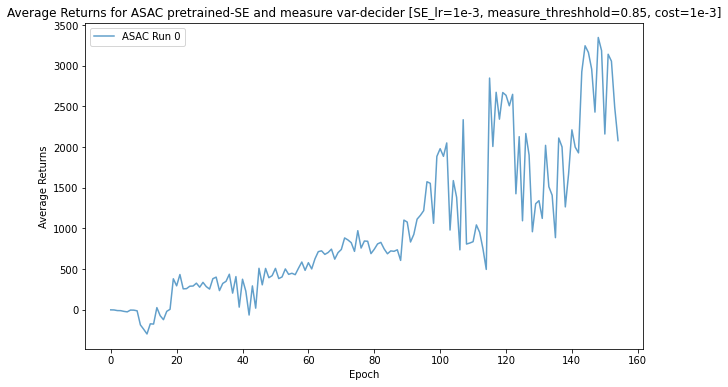

In [35]:
# Plots Average Returns

graph_type = "Average Returns"
data_key = "evaluation/Average Returns"

for i, result in enumerate(all_data):
    data = result[data_key]
    data.plot(title=f"{graph_type} for {alg_name}", 
                        xlabel="Epoch", 
                        ylabel=f"{graph_type}", 
                        label=f"ASAC Run {i}", 
                        legend=True, 
                        figsize=(10, 6),
                        alpha=0.7)

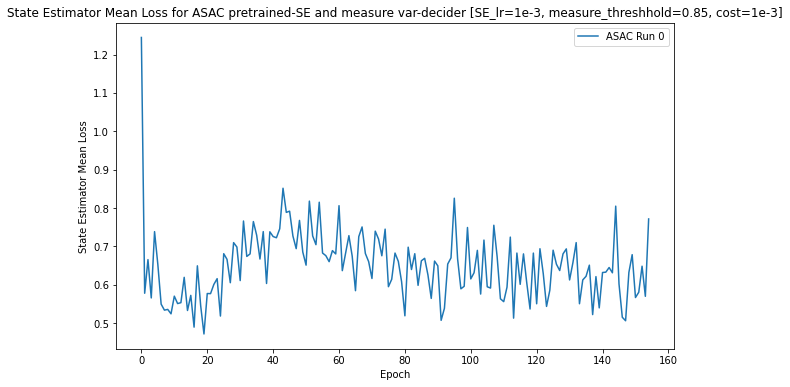

In [36]:
# Plots State Estimator Mean Loss

graph_type = "State Estimator Mean Loss"
data_key = "trainer/State Estimator Mean Loss"

for i, result in enumerate(all_data):
    data = result[data_key]
    data.plot(title=f"{graph_type} for {alg_name}", 
                        xlabel="Epoch", 
                        ylabel=f"{graph_type}", 
                        label=f"ASAC Run {i}", 
                        legend=True, 
                        figsize=(10, 6))

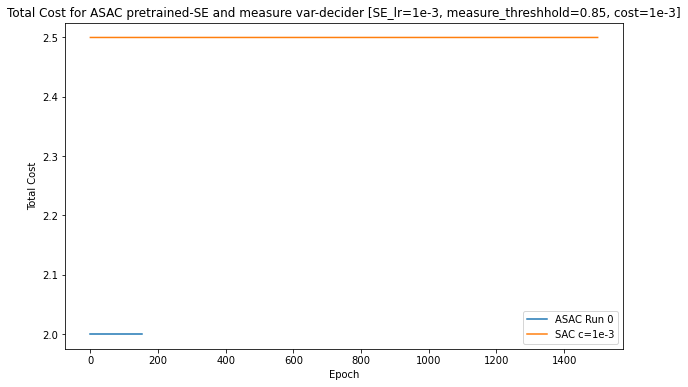

In [37]:
# Plots Agent Total Loss

graph_type = "Total Cost"
data_key = "evaluation/Total Cost"
num_epochs = 1500
cost = 1e-3
num_eval_steps = 2500

for i, result in enumerate(all_data):
    data = result[data_key]
    data.plot(title=f"{graph_type} for {alg_name}", 
                        xlabel="Epoch", 
                        ylabel=f"{graph_type}", 
                        label=f"ASAC Run {i}", 
                        legend=True, 
                        figsize=(10, 6))

extra_series = pd.Series([num_eval_steps * cost for i in range(num_epochs)])
extra_series.plot(label="SAC c=1e-3", legend=True).legend(loc='lower right')

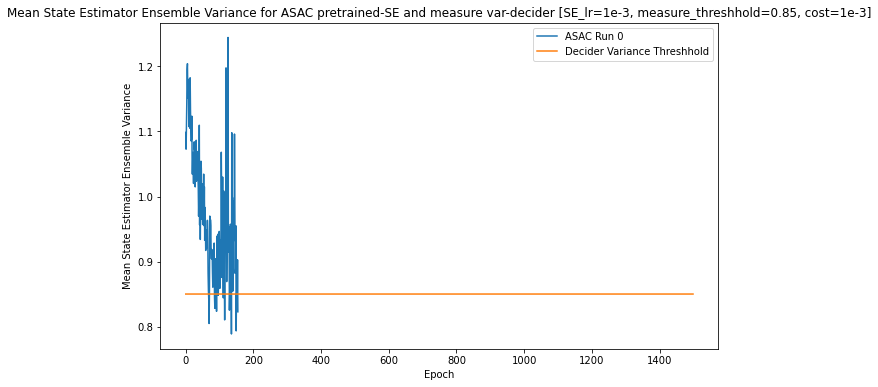

In [38]:
# Plots State Estimator Ensemble Variance

graph_type = "Mean State Estimator Ensemble Variance"
data_key = "trainer/State Estimator Variance"
num_epochs = 1500
decider_threshold = 0.85

for i, result in enumerate(all_data):
    data = result[data_key]
    data.plot(title=f"{graph_type} for {alg_name}", 
                        xlabel="Epoch", 
                        ylabel=f"{graph_type}", 
                        label=f"ASAC Run {i}", 
                        legend=True, 
                        figsize=(10, 6))

SAC_cost = pd.Series([decider_threshold for i in range(num_epochs)])
SAC_cost.plot(label="Decider Variance Threshhold", legend=True).legend(loc='upper right')

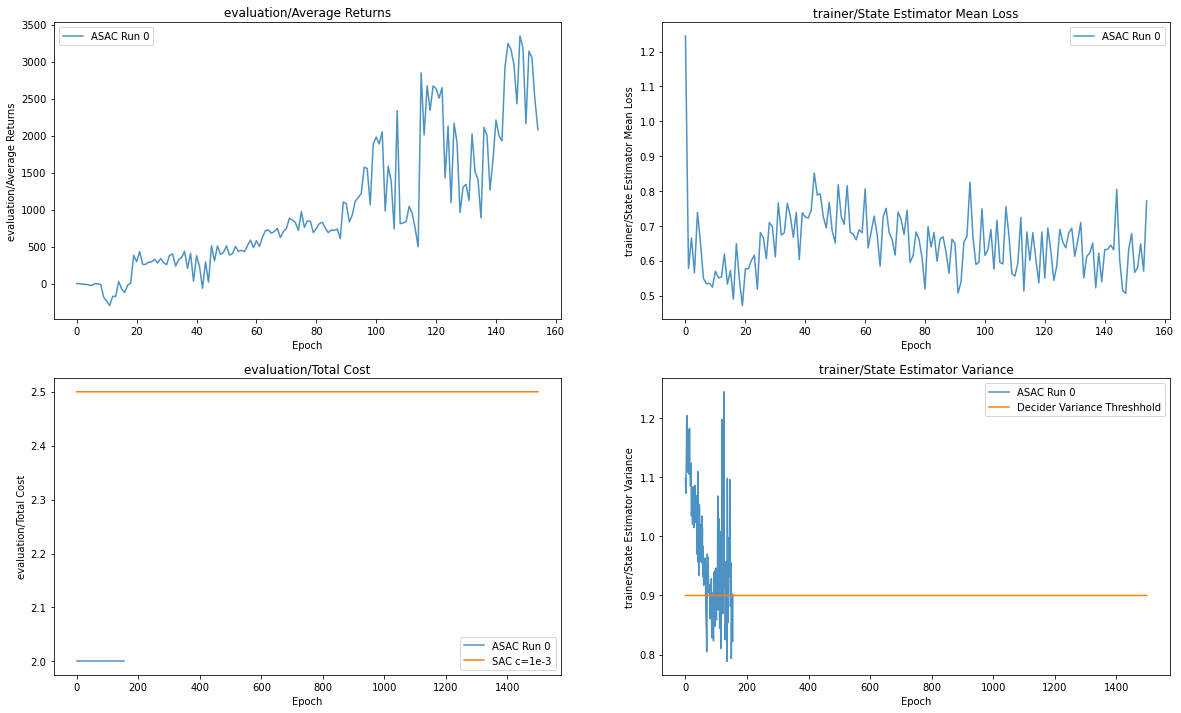

In [39]:
# Plots 2 Things

fig, axes = plt.subplots(nrows=2, ncols=2)
figsize = (20, 12)
opacity = 0.8

graph_type = "Average Returns"
data_key1 = "evaluation/Average Returns"
data_key2 = "trainer/State Estimator Mean Loss"
data_key3 = "evaluation/Total Cost"
data_key4 = "trainer/State Estimator Variance"

for i, result in enumerate(all_data):
    data1 = result[data_key1]
    data2 = result[data_key2]
    data3 = result[data_key3]
    data4 = result[data_key4]

    data1.plot(
        ax=axes[0][0],
        title=data_key1, 
        xlabel="Epoch", 
        ylabel=data_key1, 
        label=f"ASAC Run {i}", 
        legend=True,
        figsize=figsize,
        alpha=opacity
    )
    data2.plot(
        ax=axes[0][1],
        title=data_key2, 
        xlabel="Epoch", 
        ylabel=data_key2, 
        label=f"ASAC Run {i}", 
        legend=True, 
        figsize=figsize,
        alpha=opacity
    )
    data3.plot(
        ax=axes[1][0],
        title=data_key3, 
        xlabel="Epoch", 
        ylabel=data_key3, 
        label=f"ASAC Run {i}", 
        legend=True,
        figsize=figsize,
        alpha=opacity
    )
    data4.plot(
        ax=axes[1][1],
        title=data_key4, 
        xlabel="Epoch", 
        ylabel=data_key4, 
        label=f"ASAC Run {i}", 
        legend=True, 
        figsize=figsize,
        alpha=opacity
    )

num_epochs = 1500

decider_threshold = 0.90
var_thresh = pd.Series([decider_threshold for i in range(num_epochs)])
var_thresh.plot(ax=axes[1][1], label="Decider Variance Threshhold", legend=True).legend(loc='upper right')

cost = 1e-3
num_eval_steps = 2500
extra_series = pd.Series([num_eval_steps * cost for i in range(num_epochs)])
extra_series.plot(ax=axes[1][0], label="SAC c=1e-3", legend=True).legend(loc='lower right')

In [40]:
# End